<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2008.jpg)


# **Python para Machine Learning** - Parte 8

Nesse notebook vamos ver:
- O Passo-a-passo com o Scikit-Learn
- Usando o Modelo KNN
- Modelos de Regressão
- Exercício
- Links Úteis

# **O Passo-a-passo com o Scikit-Learn**

## Carregando o Conjunto de Dados

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)

## Fazendo a Divisão em Treinamento e Teste, Separados por Variáveis Resposta e Explicativas

In [5]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, Ytreino, Yteste = train_test_split(ads.loc[:, ['Age', 'EstimatedSalary']], 
                                                    ads['Purchased'], 
                                                    test_size = 0.25)

## Fazendo a Padronização das Variáveis Contínuas

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtreino = sc.fit_transform(Xtreino)
Xteste = sc.transform(Xteste)

## Ajustando o Modelo de Regressão Logística 

In [7]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt  

# Ajustando o modelo de Regressão Logística
reglog = LogisticRegression()
reglog.fit(Xtreino, Ytreino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Calculando a Acurácia

In [8]:
from sklearn.metrics import accuracy_score

preditos_treino = reglog.predict(Xtreino)
preditos_teste = reglog.predict(Xteste)

acc_treino = accuracy_score(preditos_treino, Ytreino)
acc_teste = accuracy_score(preditos_teste, Yteste)

print('A Acurácia de TREINO foi: {:.2f}%'.format(100*acc_treino))
print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TREINO foi: 85.00%
A Acurácia de TESTE foi:  81.00%


## Prevendo Novas Amostras

In [10]:
eu = {'Age': [45], 'EstimatedSalary': [100000]}

eu = pd.DataFrame(eu)

eu = sc.transform(eu)

reglog.predict(eu)

array([1])

## Gráfico de Região de Classificação

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


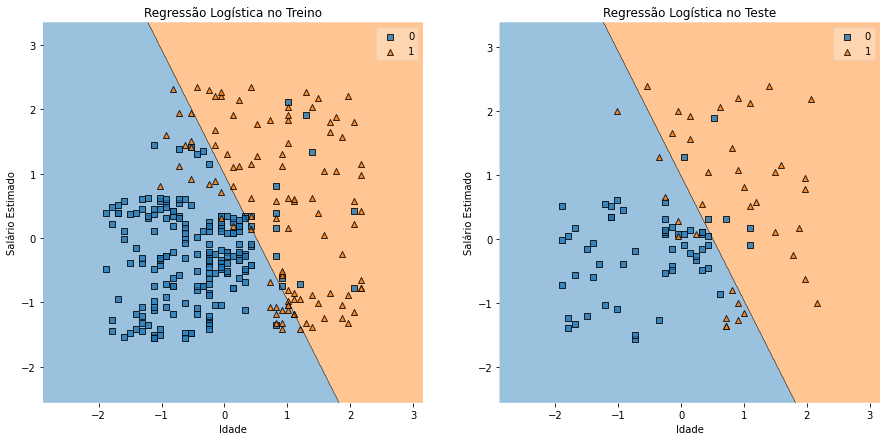

In [11]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1) 
plot_decision_regions(Xtreino, Ytreino.values, clf = reglog, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('Regressão Logística no Treino') 

plt.subplot(1, 2, 2) 
plot_decision_regions(Xteste, Yteste.values, clf = reglog, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('Regressão Logística no Teste')

plt.show()

# **Usando o Modelo KNN**

## Testando outros modelos: K-Vizinhos Mais Próximos

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(Xtreino, Ytreino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
from sklearn.metrics import accuracy_score

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

acc_treino = accuracy_score(preditos_treino, Ytreino)
acc_teste = accuracy_score(preditos_teste, Yteste)

print('A Acurácia de TREINO foi: {:.2f}%'.format(100*acc_treino))
print('A Acurácia de TESTE foi:  {:.2f}%'.format(100*acc_teste))

A Acurácia de TREINO foi: 99.33%
A Acurácia de TESTE foi:  81.00%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


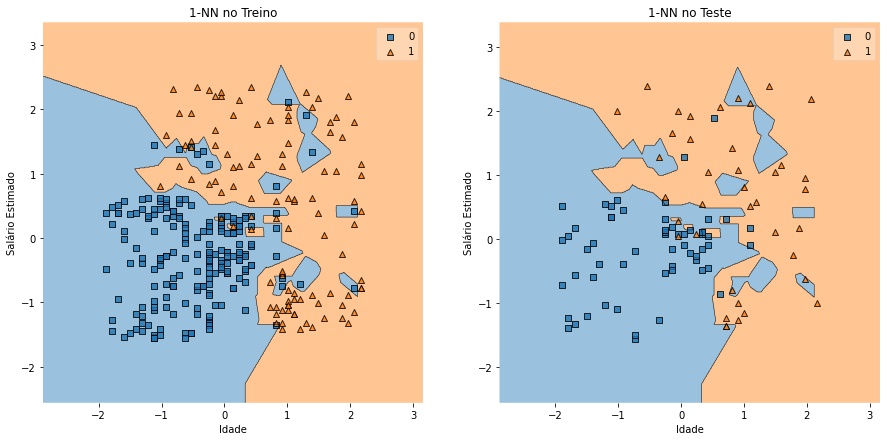

In [18]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

#Plot para o 1-NN
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(Xtreino, Ytreino)

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1) 
plot_decision_regions(Xtreino, Ytreino.values, clf = knn1, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('1-NN no Treino') 

plt.subplot(1, 2, 2) 
plot_decision_regions(Xteste, Yteste.values, clf = knn1, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('1-NN no Teste')

plt.show()


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


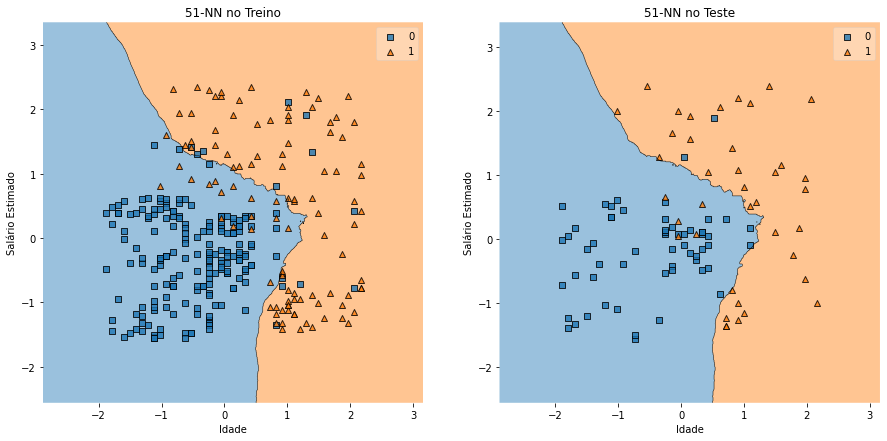

In [19]:
#Plot para o 51-NN
knn51 = KNeighborsClassifier(n_neighbors = 51)
knn51.fit(Xtreino, Ytreino)

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1) 
plot_decision_regions(Xtreino, Ytreino.values, clf = knn51, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('51-NN no Treino') 

plt.subplot(1, 2, 2) 
plot_decision_regions(Xteste, Yteste.values, clf = knn51, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('51-NN no Teste')

plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


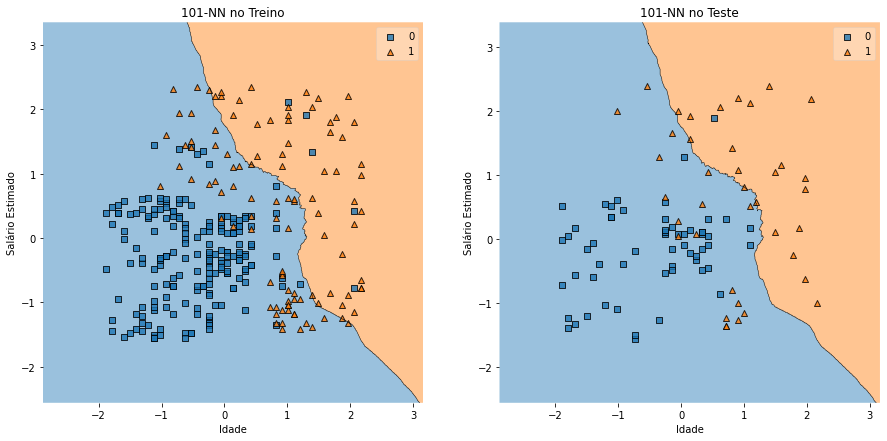

In [20]:
#Plot para o 101-NN
knn101 = KNeighborsClassifier(n_neighbors = 101)
knn101.fit(Xtreino, Ytreino)

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1) 
plot_decision_regions(Xtreino, Ytreino.values, clf = knn101, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('101-NN no Treino') 

plt.subplot(1, 2, 2) 
plot_decision_regions(Xteste, Yteste.values, clf = knn101, legend = 1)
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.title('101-NN no Teste')

plt.show()

# **Modelos de Regressão**

## Importando o conjunto de dados **mtcars**, tradicional do R, através da biblioteca **statmodels**

In [21]:
import statsmodels.api as sm 

mtcars = sm.datasets.get_rdataset('mtcars', 'datasets').data
mtcars

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Vamos utilizar a variável **hp**, horse power, para tentar prever a variável **mpg**, miles per galon.

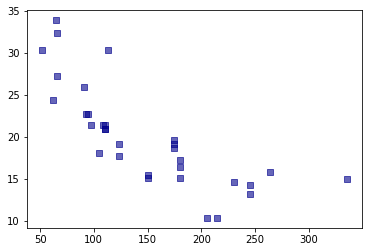

In [22]:
import matplotlib.pyplot as plt

plt.scatter(mtcars['hp'], mtcars['mpg'], marker = 's', alpha = 0.6, color = 'darkblue')
plt.show()

## Fazendo as devidas divisões para validação

In [23]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, Ytreino, Yteste = train_test_split(mtcars['hp'], mtcars['mpg'], test_size = 0.25)

In [24]:
Xtreino = Xtreino.values.reshape(-1, 1)
Xteste = Xteste.values.reshape(-1, 1)

## Utilizando o modelo de Regressão Linear

In [25]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(Xtreino, Ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Verificando o Erro Quadrático Médio nos dados de treinamento e teste

In [26]:
from sklearn.metrics import mean_squared_error

preditos_treino = reglin.predict(Xtreino)
preditos_teste = reglin.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, Ytreino)
eqm_teste = mean_squared_error(preditos_teste, Yteste)

print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio de TESTE foi:  {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio de TREINO foi: 15.79
O Erro Quadrático Médio de TESTE foi:  10.15


## Plotando a reta de solução junto aos dados de treinamento e teste

In [27]:
import numpy as np

x = np.arange(30, 350, 0.01)

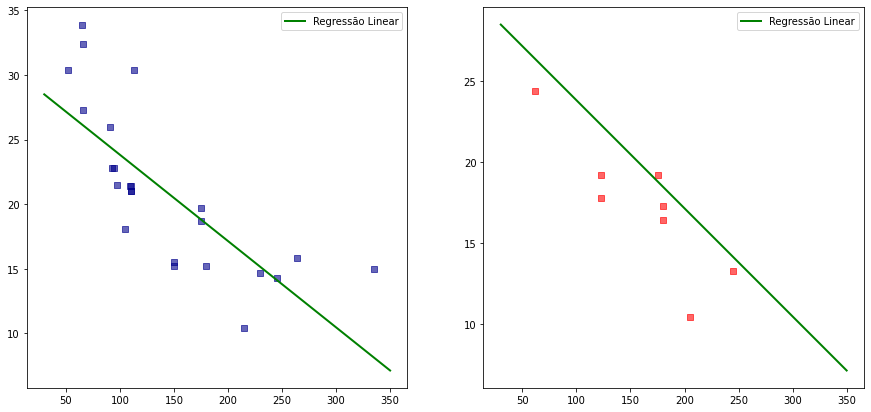

In [28]:
y = reglin.predict(x.reshape(-1, 1))
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1) 
plt.plot(x, y, color = 'green', linewidth = 2, label = 'Regressão Linear')
plt.scatter(Xtreino, Ytreino, marker = 's', alpha = 0.6, color = 'darkblue')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(x, y, color = 'green', linewidth = 2, label = 'Regressão Linear')
plt.scatter(Xteste, Yteste, marker = 's', alpha = 0.6, color = 'red')
plt.legend()

plt.show()

## Testando um segundo modelo: **K Vizinhos Mais Próximos**

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 9)
knnreg.fit(Xtreino, Ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

## Calculando o EQM

In [30]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, Ytreino)
eqm_teste = mean_squared_error(preditos_teste, Yteste)

print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio de TESTE foi:  {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio de TREINO foi: 12.61
O Erro Quadrático Médio de TESTE foi:  5.73


## Plotando as Soluções

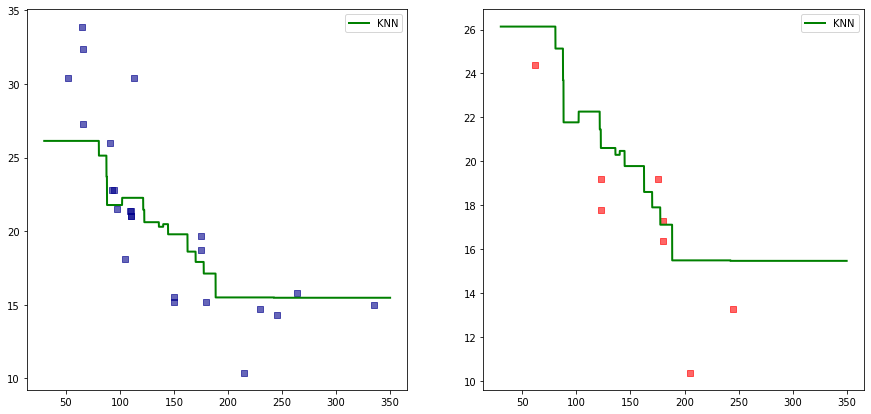

In [31]:
y = knnreg.predict(x.reshape(-1, 1))
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1) 
plt.plot(x, y, color = 'green', linewidth = 2, label = 'KNN')
plt.scatter(Xtreino, Ytreino, marker = 's', alpha = 0.6, color = 'darkblue')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(x, y, color = 'green', linewidth = 2, label = 'KNN')
plt.scatter(Xteste, Yteste, marker = 's', alpha = 0.6, color = 'red')
plt.legend()

plt.show()

## **Exercício 12**

Dada uma divisão de teste e treinamento, encontre qual é o valor de 'K' que obtém a melhor predição nos dois casos explorados acima (classificação e regressão)


## **Exercício 13**

Varie a divisão de treinamento e teste e encontre qual é o valor de 'K' que obtém a melhor predição nos dois casos explorados acima (classificação e regressão), nesse novo cenário. 


## **Links Úteis**

-[Documentação a respeito do plot de região](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-9-customizing-the-plotting-style)